# Lower Limit on the Stochastic GWB 

To find a rough estimate of the lower limit on the stochastic GWB from our source, we will use the Phinney (2001) formalism. Eq. 5 in that paper gives us the characteristic strain of the background as a function of frequency:

$$h_c^2(f) = \frac{4G}{\pi c^2} \frac{1}{f^2} \int n(z) \frac{1}{1+z} \left( f_r \frac{dE_{gw}}{df_r}\right) \bigg|_{~f_r = f(1+z)} dz$$

where $n(z)$ is the number density of sources, $f_r$ is the frequency in the rest-frame of the source, and 

$$\frac{dE_{gw}}{df_r} = \frac{\pi}{3G} \frac{(G\mathcal{M})^{5/3}}{(\pi f_r)^{1/3}}$$

This equation implicitly assumes just one chirp mass for all objects. However, we would like to integrate over a range of chirp masses. We then want the number density *per mass* of objects (to make the units right). Then, our equation is:

$$h_c^2(f) = \frac{4G}{\pi c^2} \frac{1}{f^2} \int n(z, \mathcal{M}) \frac{1}{1+z} \left( f_r \frac{\pi}{3G} \frac{(G\mathcal{M})^{5/3}}{(\pi f_r)^{1/3}}\right) \bigg|_{~f_r = f(1+z)} dz~d\mathcal{M}$$

We will compute $h_c(f)$ for three different assumptions about the number density:
1. Our object is the only one in SDSS out to $z=0.2$ and the number density of objects is constant with both redshift and chirp mass.
2. All objects like J1010+1413 are also binary AGN that should merge by today. In addition, we allow the number density of objects to vary with redshift in conjunction with the observed AGN number density evolution.
3. Same as the second case, but we allow for the number density to vary with mass, following the observed local BH mass function.

Note that we here ignore the issue of *when* exactly these sources will be in the PTA band -- we just assume that all of our sources would be in the PTA band by today. We also only consider equal mass mergers.

## Case 1: Only Object in SDSS + Constant Number Density

We will assume that the number density per mass is *constant* and equal to what we find for our object. In other words,

Specifically, we will calculate our number density per mass as:

$$n_0 = \frac{N}{\Delta V \Delta \mathcal{M}}$$

where $N$ is the number of sources. Note that now this number does not depend on the actual integration variables anymore. So, pulling out the number density per mass and cleaning up our equation, we find:

$$h_c^2(f) = \frac{4}{3\pi^{1/3}c^2} \frac{n_0}{f^{4/3}} \int \frac{(G\mathcal{M})^{5/3}}{(1+z)^{1/3}} dz~d\mathcal{M}$$

To keep our code general, we will integrate from $z_{\rm{min}}$ to $z_{\rm{max}}$ and $\mathcal{M}_{\rm{min}}$ to $\mathcal{M}_{\rm{max}}$. Then, our final equation is:

$$h_c^2(f) = \frac{3G^{5/3}}{4\pi^{1/3}c^2} \frac{n_0}{f^{4/3}} \left[(1+z_{\rm{max}})^{2/3} - (1+z_{\rm{min}})^{2/3}\right]\times \left[\mathcal{M}_{\rm{max}}^{8/3} - \mathcal{M}_{\rm{min}}^{8/3}\right]$$

## Case 2: J1010+1413 has lots of buddies + number density changes with redshift

In this case, we need to be a bit more careful with how we calculate the number density.

Let $N_0$ refer to the number density of objects within the narrow redshift range around J1010+1413. Specifically,

$$N_0 = f_{\rm{merger}}\frac{N}{\Delta V(z=0.18 - 0.22)}$$

where $N$ is the total number of objects that are like J1010+1413 in the redshift range z=0.18-0.22 and $f_{\rm{merger}}$ is the observed fraction of AGN that are in merging systems at z=0.25 and with $L_{\rm{AGN}}=10^{46}~\rm{erg/s}$ (see Hickox+ 2014, Fig. 6, dashed, blue line).

This will anchor the number density of objects contributing to the PTA band *today*. To get the number density as a function of redshift, we simply multiply this by the functional form of the observed AGN number density (Hopkins 2007), $\hat{N}(z)$.

Finally, we obtain a number density/mass just as before:

$$n(z,\mathcal{M}) = \frac{N_0\ \hat{N}(z)}{\Delta \mathcal{M}} = n_0\ \hat{N}(z)$$


For our characteristic strain, we now have:


$$h_c^2(f) = \frac{4}{3\pi^{1/3}c^2} \frac{n_0}{f^{4/3}} \int (G\mathcal{M})^{5/3} \frac{\hat{N}(z)}{(1+z)^{1/3}} dz~d\mathcal{M}$$


We will need to do the redshift integral numerically, but we can at least do the mass integral analytically, giving us:

$$h_c^2(f) = \frac{G^{5/3}}{2\pi^{1/3}c^2} \frac{n_0}{f^{4/3}} \left[\mathcal{M}_{\rm{max}}^{8/3} - \mathcal{M}_{\rm{min}}^{8/3}\right] \int \frac{\hat{N}(z)}{(1+z)^{1/3}} dz $$

## Case 3: J1010+1413 has lots of buddies + number density changes with redshift & mass

In this case, we will allow the number density to vary with mass as well. In other words, 

$$n(z, \mathcal{M}) = n_0 p(\mathcal{M}) \hat{N}(z)$$

where $n_0$ is calculated as in case 2, and $p(\mathcal{M})$ is the probability of having a particular chirp mass. This is set by using the BH mass function at z=0 given by Marconi+ 2004 and normalizing this function to the number density at z=0 from case 2. We set our mass ratio = 1, thus there is a simple 1-1 and onto transformation from the BH mass function  to the chirp mass function. We just transform this by setting appropriate chirp mass limits in our integration.

Then, for our characteristic strain, we have:


$$h_c^2(f) = \frac{4}{3\pi^{1/3}c^2} \frac{n_0}{f^{4/3}} \int (G\mathcal{M})^{5/3} \frac{p(\mathcal{M})\hat{N}(z)}{(1+z)^{1/3}} dz~d\mathcal{M}$$

We will have to do both of these integrals numerically now.

In [1]:
## Import packages
import numpy as np

import astropy.units as u
import astropy.constants as const
import astropy.uncertainty as unc

from astropy.cosmology import WMAP9, z_at_value

import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import truncnorm
from scipy.integrate import quad_vec
from scipy.special import gamma
from IPython.display import display, Math

## Set plot parameters
%matplotlib inline
sns.set_context("paper", font_scale=1.5)
sns.set_style('ticks')
sns.set_palette('colorblind')
figparams = {'font.family': 'DejaVu Sans',
             'font.serif':'Times',
             'text.latex.preamble': [r'\usepackage{amsmath}'],
             'text.usetex': True,
             'hatch.linewidth' : 3.0}
plt.rcParams.update(figparams)
cs = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [2]:
## function parameters
n_samples = int(1e4)  # set a consistent number of samples for params
# density function
logphi_norm = unc.normal(-4.825, std=0.060, n_samples=n_samples).distribution
logL_break0 = unc.normal(13.036, std=0.043, n_samples=n_samples).distribution
kL1 = unc.normal(0.632, std=0.077, n_samples=n_samples).distribution
kL2 = unc.normal(-11.76, std=0.38, n_samples=n_samples).distribution
kL3 = unc.normal(-14.25, std=0.80, n_samples=n_samples).distribution
gamma10 = unc.normal(0.417, std=0.055, n_samples=n_samples).distribution
kgamma1 = unc.normal(-0.623, std=0.132, n_samples=n_samples).distribution
gamma20 = unc.normal(2.174, std=0.055, n_samples=n_samples).distribution
kgamma21 = unc.normal(1.460, std=0.096, n_samples=n_samples).distribution
kgamma22 = unc.normal(-0.793, std=0.057, n_samples=n_samples).distribution

# mass function
a = unc.normal(8.30, std=0.07, n_samples=n_samples).distribution
b = unc.normal(4.11, std=0.33, n_samples=n_samples).distribution
phi_st = unc.normal(0.002, std=0.0001, n_samples=n_samples).distribution

sig = 88.8  # unc.normal(88.8, std=17.7, n_samples=n_samples).distribution
alpha = 6.5  # unc.normal(6.5, std=1., n_samples=n_samples).distribution
beta = 1.93  # unc.normal(1.93, std=0.22, n_samples=n_samples).distribution
# for the above parameters, Sheth+ (2003) note that they are highly
# coveriant, so the errors are generally ignored

## (Mingarelli+ 2017) parameters
N_225 = unc.Distribution(truncnorm.rvs(a=(0 - 91) / 7,
                                       b=(np.inf - 91) / 7,
                                       loc=91, scale=7,
                                       size=n_samples)).distribution
distance = 225. * u.Mpc
z_225 = z_at_value(WMAP9.angular_diameter_distance, distance, zmax=1.)

## integration parameters
zmin = 0.
zmax = 1.

q = .78  # assuming equal mass mergers for now. note that if we integrate over
        # q we will have to replace the chirp mass integrals

# min/max BH mass to consider
m_min = 10. ** (8.46) * u.Msun
m_max = 1e10 * u.Msun

# min/max chirp masses based on order of magnitude BH masses expected
min_mchirp = (.25 / (1.25) ** 2) ** (3. / 5.) * m_min
max_mchirp = (1. / (2.) ** 2) ** (3. / 5.) * m_max

## definitional parameters
f = (1. / u.yr).to(u.Hz)

## plot regions
freq = (np.logspace(-2, 2) / u.yr).to(u.Hz)
fidhz = (1./u.yr).to(u.Hz)
ptalimit = 1.45e-15 * (freq / f) ** (-2./3.)
iptafuturelimit = 4.e-16 * (freq / f) ** (-2./3.)

In [3]:
## Define functions
def nz(logL, z, z_ref=2., scale=np.ones(n_samples)):
    '''Number density of quasars at a given luminosity.
    
    Parameters
    ----------
    logL : float
        Log of the AGN luminosity to use for calculating the number
        density.
        Units: log10(Lsun)
    z : float
        Redshift to calculate number density at.
        Units: None
    z_ref : float, optional
        Reference redshift against which density evolution is
        calculated.
        Units: None 
    scale : array_like, optional
        Scaling relation to use for normalization.
        Units: None
        
    Returns
    -------
    float
        Number density at a given z value.
        Units: 1/Mpc**3 (implicit)
        
    Notes
    -----
    This number density is based on the one found in the "Full" best
    fit by Hopkins et al. (2007) [1]_, which is a double power law with
    exponentials that evolve with redshift.
    
    .. [1] P. F. Hopkins, G. T. Richards, and L. Hernquist,
       The Astrophysical Journal 654, 731 (2007).

    
    '''
    xi = np.log10((1. + z) / (1. + z_ref))
    logL_break = (logL_break0 + (kL1 * xi) 
                  + (kL2 * (xi ** 2.)) + (kL3 * (xi ** 3.)))
    
    gamma1 = gamma10 * (10. ** (xi * kgamma1))
    gamma2 = (2. * gamma20) / ((10. ** (kgamma21 * xi))
                               + (10. ** (kgamma22 * xi)))

    return scale * ((10. ** logphi_norm) / 
            (((10. ** (logL - logL_break)) ** gamma1) 
            + ((10. ** (logL - logL_break)) ** gamma2)))


def phi(sigma):
    '''Number density per comoving volume of velocity dispersions.
    
    Parameters
    ----------
    sigma : float
        The velocity dispersion to calculate number density for.
        Units: km / s (implicit)
        
    Returns
    -------
    float
        Number density for a given dispersion.
    
    Notes
    -----
    Based on the best fit analytical form of the number density
    dispersion found by Sheth et al. (2003) [1]_.
    
    .. [1] R. K. Sheth, M. Bernardi, P. L. Schechter, S. Burles,
       D. J. Eisenstein, D. P. Finkbeiner, J. Frieman, R. H. Lupton,
       D. J. Schlegel, M. Subbarao, K. Shimasaku, N. A. Bahcall,
       J. Brinkmann, and Ž. Ivezić, The Astrophysical Journal 594,
       225 (2003).

    '''
    return (phi_st * ((sigma / sig) ** alpha)
            * np.exp(-1. * (sigma / sig) ** beta)
            / gamma(alpha / beta) * beta / sigma)
    
    
def dBHMF(M, x, disp):
    '''Discrete element of the black hole mass function (BHMF).
    
    Parameters
    ----------
    M : float
        Mass to eveluate BHMF at.
        Units: Msun (implicit)
    x : float
        Value of the observable used to calculate the element.
        Units: arbitrary (implicit)
    disp : float
        Intrinsic dispersion in log(M) for a constant log(x).
        Units: None
    
    Returns
    -------
    float
        Density per unit mass of black holes at a given mass associated
        with given observable x.
        
    Notes
    -----
    Based on equation (3) in Marconi et al. (2004) [1]_.
    
    .. [1] A. Marconi, G. Risaliti, R. Gilli, L. K. Hunt, R. Maiolino,
       and M. Salvati, Monthly Notices of the Royal Astronomical
       Society 351, 169 (2004).

    '''
    P = ((1. / (disp * np.sqrt(2. * np.pi)))
         * np.exp(-.5 * ((np.log10(M) - a
                          - b * (np.log10(x) - 2.3)) / disp) ** 2.))
    d = (P * phi(x)) / (M * np.log(10))
    return d


def BHMF(M, disp):
    '''Black Hole Mass Function (BHMF).
    
    Parameters
    ----------
    M : float
        Black hole mass to calculate mass function at.
        Units: Msun (implicit)
    disp : float
        intrinsic dispersion in log(M) for a constant log(x), where x
        is an observable that can be associated with M (e.g. velocity
        dispersion).
    
    Returns
    -------
    float
        Black hole mass function evaluated at M (dN/dM_BH).
        Units: 1/(Msun * Mpc**3) (implicit)
        
    Notes
    -----
    This is an implementation of equation (3) in
    Marconi et al. (2003) [1]_. `quad_vec` is used to integrate so that
    uncertainties present when using Monte Carlo simulations are
    preserved.
    
    .. [1] A. Marconi, G. Risaliti, R. Gilli, L. K. Hunt, R. Maiolino,
       and M. Salvati, Monthly Notices of the Royal Astronomical
       Society 351, 169 (2004).
    
    '''
    integ = lambda sigma: dBHMF(M, sigma, disp)
    return quad_vec(integ, 0, 1e6)[0]

# Case 1
First we compute the number density $n_{1}$ assuming it is constant with redshift and chirp mass

In [4]:
vol = WMAP9.comoving_volume(z_225).value
nz1 = N_225 / vol
order = 10. ** np.floor(np.log10(np.mean(nz1)))
display(Math(r'\hat{{N}}_{{1}} = ({0:.1f} \pm {1:.1f}) \times 10^{{{2}}}'
             r' \text{{Mpc}}^{{-3}}'
             .format(np.mean(nz1)/ order,
                     np.std(nz1) / order, np.log10(order))))

<IPython.core.display.Math object>

In [5]:
## Sanity check for the number of black holes, which should match Mingarelli+ 2017
totn_lowest = nz1 * vol
print("Total number of black holes is: {0:.0f} +/- {1:.0f}"
      .format(np.mean(totn_lowest), np.std(totn_lowest)))

Total number of black holes is: 91 +/- 7


In [6]:
## Now calculate the number density/mass for all
DeltaM = max_mchirp - min_mchirp
nzm1 = (nz1 / DeltaM).value
order = 10. ** np.floor(np.log10(np.mean(nzm1)))
display(Math(r'n_{{1}} = ({0:.1f} \pm {1:.1f}) \times 10^{{{2}}}'
             r' M_{{\odot}}^{{-1}}\,\text{{Mpc}}^{{-3}}'
             .format(np.mean(nzm1) / order,
                     np.std(nzm1) / order, np.log10(order))))

<IPython.core.display.Math object>

In [7]:
coeffs = 3. * const.G ** (5. / 3.) / (4. * np.pi ** (1. / 3.) * const.c ** 2.)
z_int = ((1 + zmax) ** (2. / 3.) - (1 + zmin) ** (2. / 3.))
massint = max_mchirp ** (8. / 3.) - min_mchirp ** (8. / 3.)
hc1 = np.sqrt(coeffs * z_int * massint * nzm1 * (f ** (- 4. / 3.)) / (u.Msun * u.Mpc ** 3)).to('')
order = 10. ** np.floor(np.log10(np.mean(hc1)))
display(Math(r'h_{{c, 1}} = ({0:.1f} \pm {1:.1f}) \times 10^{{{2}}}'
             .format(np.mean(hc1) / order,
                     np.std(hc1) / order, np.log10(order))))

<IPython.core.display.Math object>

## Case 2
Next we let $n = n(z)$, such that the density varies with redhsift (and keeping it constant with mass).

In [8]:
# next we set our normalization scale, assuming this is independent of z, such that we have the same density at z=0 as expected
scale = nz1 / nz(np.log10((1. * (10. ** (46.)) * u.erg / u.s)
                          .to(u.Lsun).value), 0)

# now we can find n(z=0)
nz2 = nz(np.log10((1. * (10. ** (46.)) * u.erg / u.s).to(u.Lsun).value),
         0, scale=scale)
nz2_q = np.quantile(nz2, q=[.16, .5, .84])
order = 10. ** np.floor(np.log10(nz2_q[1]))
display(Math(r'\hat{{N}}_{{2}} = ({0:.1f}_{{-{1:.1f}}}^{{+{2:.1f}}})'
             r' \times 10^{{{3}}} \text{{Mpc}}^{{-3}}'
             .format(nz2_q[1] / order,
                     (nz2_q[1] - nz2_q[0]) / order,
                     (nz2_q[2] - nz2_q[1]) / order, np.log10(order))))

<IPython.core.display.Math object>

In [9]:
# next we get the number density per unit mass
## Now calculate the number density/mass for all
DeltaM = max_mchirp - min_mchirp
nzm2 = (nz2_q / DeltaM).value
order = 10. ** np.floor(np.log10(nzm2[1]))
display(Math(r'n_{{2}} = ({0:.1f}_{{-{1:.1f}}}^{{+{2:.1f}}})'
             r' \times 10^{{{3}}} M_{{\odot}}^{{-1}}\,\text{{Mpc}}^{{-3}}'
             .format(nzm2[1] / order,
                     (nzm2[1] - nzm2[0]) / order,
                     (nzm2[2] - nzm2[1]) / order, np.log10(order))))

<IPython.core.display.Math object>

In [10]:
coeffs = const.G ** (5. / 3.) / (2. * np.pi ** (1. / 3.) * const.c ** 2)
z_int = lambda z: nz(np.log10((1. * (10. ** (46.)) * u.erg / u.s)
                              .to(u.Lsun).value), z,
                     scale=(scale / DeltaM.value)) / ((1 + z) ** (1. / 3.))
z_term = (quad_vec(z_int, zmin, zmax)[0]
          * (1. / u.Mpc ** 3) * (1. / u.Msun))
massint = max_mchirp ** (8. / 3.) - min_mchirp ** (8. / 3.)

hc2 = np.sqrt(coeffs * z_term * massint * (f ** (- 4. / 3.))).to('')
hc2_q = np.quantile(hc2, q=[.16, .5, .84])
order = 10. ** np.floor(np.log10(hc2_q[1]))
display(Math(r'h_{{c, 2}} = ({0:.1f}_{{-{1:.1f}}}^{{+{2:.1f}}})'
             r' \times 10^{{{3}}}'.format(hc2_q[1] / order,
                                          (hc2_q[1] - hc2_q[0]) / order,
                                          (hc2_q[2] - hc2_q[1]) / order,
                                          np.log10(order))))

<IPython.core.display.Math object>

## Case 3
Now we also let the number density vary with chirp mass. This amounts to weighting the number density at each mass by the probability of having a chirp mass at that value.

In [11]:
# first we normalize the mass function so we get a probability. This
# also gives the correct units for the mass dependency
m_int = lambda M: BHMF(M, 0.3)
norm = 1. / quad_vec(m_int, min_mchirp.value, max_mchirp.value)[0]

In [12]:
# now we do our integral again, this time with varying mass
coeffs = 4. * const.G ** (5. / 3.) / (3. * np.pi ** (1. / 3.) * const.c ** 2)

# we use a z term that is not scaled by the masses, since we have a
# variable mass term
z_int = lambda z: nz(np.log10((1. * (10. ** (46.)) * u.erg / u.s)
                              .to(u.Lsun).value), z,
                     scale=scale) / ((1 + z) ** (1. / 3.))
z_term = (quad_vec(z_int, zmin, zmax)[0]
          * (1. / u.Mpc ** 3) * (1. / u.Msun))

m_int = lambda M: (M ** (5./3.)) * BHMF(M, 0.3)
m_term = (quad_vec(m_int, min_mchirp.value, max_mchirp.value)[0]
          * u.Msun ** (8. / 3.))
hc3 = np.sqrt(coeffs * z_term * m_term * norm
              * (f ** (- 4. / 3.))).to('').value

In [13]:
# finally, grab our accepted values and associated confidence interval
hc3_q = np.quantile(hc3, q=[.16, .5, .84])
order = 10. ** np.floor(np.log10(hc3_q[1]))
display(Math(r'h_{{c, 3}} = ({0:.1f}_{{-{1:.1f}}}^{{+{2:.1f}}})'
             r' \times 10^{{{3}}}'.format(hc3_q[1] / order,
                                          (hc3_q[1] - hc3_q[0]) / order,
                                          (hc3_q[2] - hc3_q[1]) / order,
                                          np.log10(order))))

<IPython.core.display.Math object>

## Plots

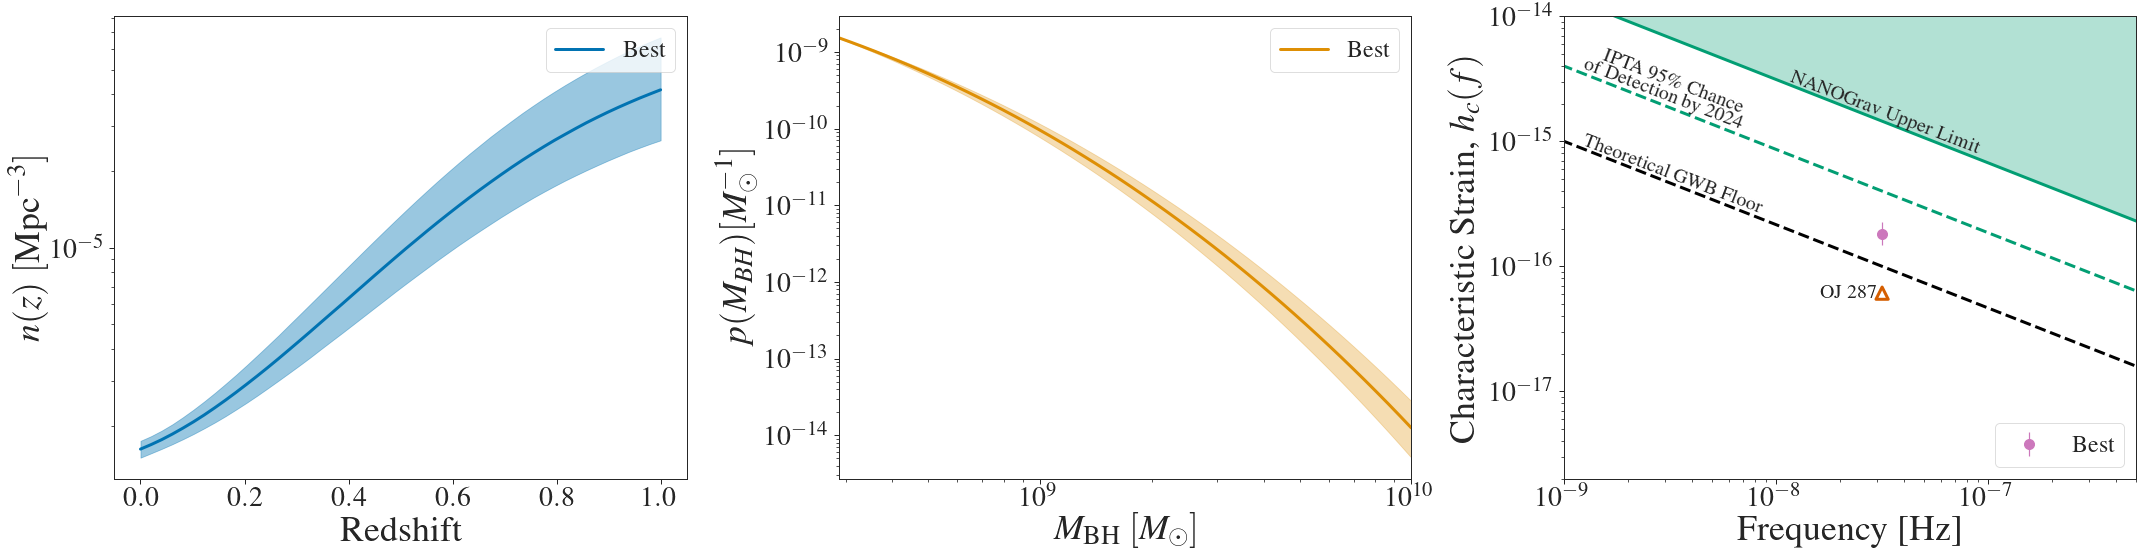

In [14]:
fig, ax = plt.subplots(1,3,figsize=(30,8))
fsize = 36
legendfsize = 24
fsize2 = 20
ticksize = 28
ax[0].tick_params(labelsize = ticksize)
ax[1].tick_params(labelsize = ticksize)
ax[2].tick_params(labelsize = ticksize)

## for n(z) plot
zrange = np.linspace(zmin, zmax)
ndz = [nz(np.log10((1. * (10. ** (46.)) * u.erg / u.s).to(u.Lsun).value),
         zi, scale=scale) for zi in zrange]

ndz_q = np.quantile(ndz, q=[.16, .5, .84], axis=1)

mrange = np.logspace(np.log10(m_min.value), np.log10(m_max.value))
mf = [BHMF(mi, 0.3) * norm for mi in mrange]
mf_q = np.quantile(mf, q=[.16, .5, .84], axis=1)

floor = 1.e-16*(freq/fidhz)**(-2./3.)

### Number density v redshift
ax[0].fill_between(zrange, ndz_q[0], ndz_q[2], color=cs[0], alpha=0.4)
ax[0].plot(zrange, ndz_q[1], color=cs[0], label='Best', linewidth=3)
ax[0].legend(fontsize=legendfsize)
ax[0].set_yscale('log')
ax[0].set_xlabel(r'Redshift',fontsize=fsize)
ax[0].set_ylabel(r'$n(z)\ [\rm{Mpc}^{{-3}}]$',fontsize=fsize)

##### pdf for mass
logMwidth = np.log10(DeltaM.value)
ax[1].plot(mrange, mf_q[1], color=cs[1], label='Best', linewidth=3)
ax[1].fill_between(mrange, mf_q[0], mf_q[2], color=cs[1], alpha=0.3)
ax[1].set_xlabel(r'$M_{\rm{BH}}\ [M_{\odot}]$',fontsize=fsize)
ax[1].set_ylabel(r'$p(M_{{BH}}) [M_{\odot}^{{-1}}]$',fontsize=fsize);
ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].set_xlim([m_min.value, m_max.value])
handles, labels = ax[1].get_legend_handles_labels()
ax[1].legend(fontsize=legendfsize)

##### LIMITS
ax[2].loglog(freq, ptalimit, color=cs[2],linewidth=3)
ax[2].fill_between(freq, ptalimit, 1.e-12*np.ones(len(freq)),alpha=0.3, color=cs[2])
ax[2].annotate("NANOGrav Upper Limit", xy=(freq.value[19], ptalimit.value[19]), xytext=(3, 3),
               textcoords="offset points", rotation_mode='anchor',
               rotation=-21, fontsize=fsize2)

ax[2].loglog(freq, floor, color='black', linestyle='dashed',  linewidth=3)
ax[2].annotate("Theoretical GWB Floor", xy=(freq.value[7], floor.value[7]),
               xytext=(3, 3), textcoords="offset points", 
                rotation_mode='anchor', rotation=-21, fontsize=fsize2)

ax[2].loglog(freq, iptafuturelimit, c=cs[2],linewidth=3, linestyle='dashed')
ax[2].annotate(r'IPTA 95\% Chance\\ of Detection by 2024',
               xy=(freq.value[7], iptafuturelimit.value[7]), xytext=(3, 3),
               textcoords="offset points", rotation_mode='anchor', rotation=-21,
               fontsize=fsize2)

ax[2].scatter(fidhz.value, 6.1e-17, color=cs[3], marker='^', s=150,
              facecolor='none', linewidth=3)
ax[2].annotate("OJ 287", xy=(fidhz.value, 6.1e-17), xytext=(-5, 0),
               textcoords="offset points", fontsize=fsize2, ha='right', va='center')
# ax[2].text(fidhz.value-1.75e-8, 6.01e-17, 'OJ 287', fontsize=fsize2)
ax[2].errorbar(fidhz.value, hc3_q[1],
               yerr=[[hc3_q[1] - hc3_q[0]], [(hc3_q[2] - hc3_q[1])]], fmt='o',
               markersize=10, color=cs[4], label='Best')
ax[2].legend(loc='lower right',fontsize=legendfsize)
ax[2].set_xlabel(r'Frequency [Hz]',fontsize=fsize)
ax[2].set_ylabel(r'Characteristic Strain, $h_c(f)$',fontsize=fsize)
ax[2].set_xlim([1.e-9, 5.e-7])
ax[2].set_ylim([2.e-18, 1.e-14])
plt.tight_layout()
plt.savefig('stochasticgwb_limits_3panel.png', dpi=500)